In [53]:
%reload_ext autoreload
%autoreload 2
from airplane_system import AirplaneSystem
import numpy as np
from proj_helpers import *
from rrt import *
import time
from IPython.display import HTML

In [3]:
# 6D state (x, z, V, gamma, theta, q)
x0 = np.array([0.0, 1.3, 6.0, 0.0, 5.0*np.pi/180.0, 0.0])
airplane = AirplaneSystem()
input_trajectory, state_trajectory_approx, time_array = airplane.trajOpt(x0, dircol=0, second_pass=False)
# input_trajectory_2, state_trajectory_approx_2, time_array_2 = airplane.trajOpt(x0, dircol=1, second_pass=True)


Number of decision vars 1287
** solver begin with N = 160 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 10.8 seconds **

t_f computed: 16.667 seconds
cost computed: 3108.372


computing TVLQR along trajectory
finer dynamics simulated


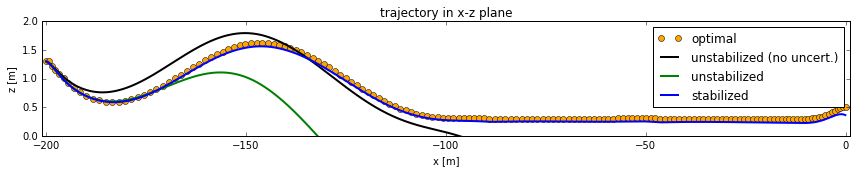

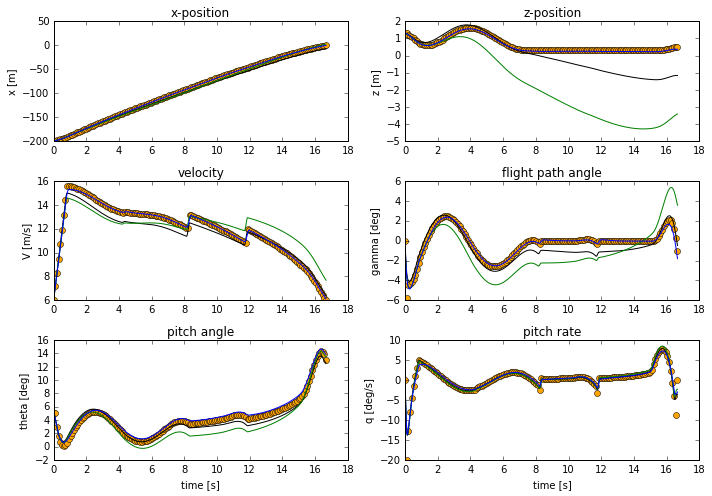

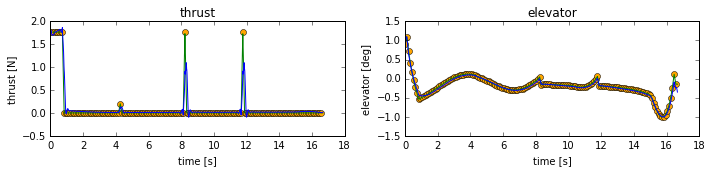

In [4]:
trajplot = simAndCompare(airplane, x0, compare=True)
trajplot.show()

In [120]:
knots_full = range(0,len(airplane.ttraj)-1,5)
knots_full = knots_full[::-1] # go backwards from goal
t0 = time.time()
rho_full = getRho(airplane, knots_full, False)
t1 = time.time()
print('sweep finished in %.2f seconds' % (t1-t0))

i:  0 , knot:  155 , rho:  0.0360406494141
i:  1 , knot:  150 , rho:  0.03796875
i:  2 , knot:  145 , rho:  0.0480541992188
i:  3 , knot:  140 , rho:  0.0405457305908
i:  4 , knot:  135 , rho:  0.0360406494141
i:  5 , knot:  130 , rho:  0.0360406494141
i:  6 , knot:  125 , rho:  0.0360406494141
i:  7 , knot:  120 , rho:  0.0360406494141
i:  8 , knot:  115 , rho:  0.0360406494141
i:  9 , knot:  110 , rho:  0.03796875
i:  10 , knot:  105 , rho:  0.0304092979431
i:  11 , knot:  100 , rho:  0.0360406494141
i:  12 , knot:  95 , rho:  0.0304092979431
i:  13 , knot:  90 , rho:  0.03796875
i:  14 , knot:  85 , rho:  0.0304092979431
i:  15 , knot:  80 , rho:  0.04271484375
i:  16 , knot:  75 , rho:  0.03375
i:  17 , knot:  70 , rho:  0.03796875
i:  18 , knot:  65 , rho:  0.0284765625
i:  19 , knot:  60 , rho:  0.03375
i:  20 , knot:  55 , rho:  0.03796875
i:  21 , knot:  50 , rho:  0.0320361328125
i:  22 , knot:  45 , rho:  0.0405457305908
i:  23 , knot:  40 , rho:  0.03796875
i:  24 , knot:  3

<IPython.core.display.Javascript object>


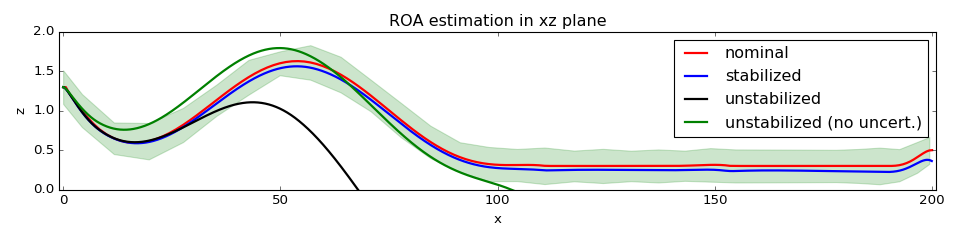

In [186]:
funnelplot = plotTrajFunnel(airplane, rho_full, knots_full)
funnelplot.legend(('nominal', 'stabilized', 'unstabilized', 'unstabilized (no uncert.)'))
# funnelplot.savefig('figs/funnel_traj2.png', dpi=300)
funnelplot.show()

In [99]:
horizontal_starts = np.arange(0,151,5)
x0_sweep = np.zeros((horizontal_starts.shape[0], x0.shape[0]))
sys_sweep = []

for i, start in enumerate(horizontal_starts):
    x0_sweep[i,:] = x0
    x0_sweep[i,0] = start
    if np.mod(i, 2) == 0:
        x0_sweep[i,1] = x0[1] - 0.5

    sys = AirplaneSystem()
    utraj, xtraj, ttraj = sys.trajOpt(x0_sweep[i,:], dircol=0, second_pass=False)
    sys_sweep.append(sys)
    print 'i: ', i, ', tf: ', ttraj[-1]


Number of decision vars 1287
** solver begin with N = 160 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 8.4 seconds **

t_f computed: 16.667 seconds
cost computed: 3243.994
i:  0 , tf:  16.6666666667
Number of decision vars 1255
** solver begin with N = 156 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 12.0 seconds **

t_f computed: 16.250 seconds
cost computed: 2949.080
i:  1 , tf:  16.25
Number of decision vars 1223
** solver begin with N = 152 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 7.0 seconds **

t_f computed: 15.833 seconds
cost computed: 2899.850
i:  2 , tf:  15.8333333333
Number of decision vars 1191
** solver begin with N = 148 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 5.7 seconds **

t_f computed: 15.417 seconds
cost computed: 2647.841
i:  3 , tf:  15.4166666667
Number of decision vars 1159
** solver begin with N = 144 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 10.4 seconds **

t_f compute

<IPython.core.display.Javascript object>


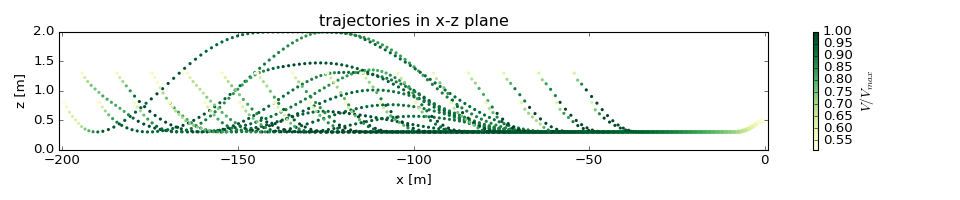

In [100]:
plotMultipleTraj(sys_sweep)

<IPython.core.display.Javascript object>


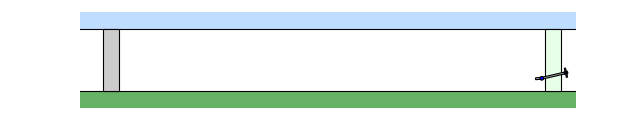

Spawning PlanarRigidBodyVisualizer for tree with 0 actuators


In [149]:
viz = urdfViz(airplane)
# viz.save('figs/urdfViz3.mp4', dpi=350)
# plt.close()
# HTML(viz.to_html5_video())

<IPython.core.display.Javascript object>


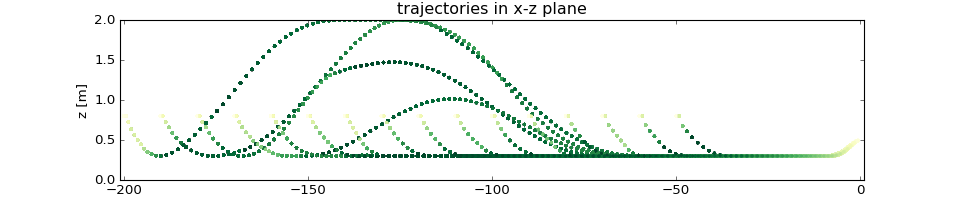

In [102]:
%matplotlib nbagg
animateMultipleTraj(sys_sweep[0::2], saveprefix='figs/even_step')

In [54]:
# do a simple RRT with obstacles
obs = np.array([[-100, 0, 10, 1.0], [-30, 0, 10, 1.0], [-160, 1.0, 10, 1.0]])
x0_rrt = np.array([-200.0, 1.3, 6.0, 0.0, 5.0*np.pi/180.0, 0.0])
xg_rrt = np.array([0.0, 1.3, 6.0, 0.0, 5.0*np.pi/180.0, 0.0])
airplane_rrt = AirplaneSystem()
rrt = RRTStar(x0_rrt, xg_rrt, airplane_rrt, obs)
goal_node = rrt.run()

Number of decision vars 1287
** solver begin with N = 160 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 10.1 seconds **

t_f computed: 16.667 seconds
cost computed: 3243.918
goal reachable from start but not obstacle free
i:  0
Number of decision vars 535
** solver begin with N = 66 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.8 seconds **

t_f computed: 24.918 seconds
i:  1
Number of decision vars 1119
** solver begin with N = 139 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 6.5 seconds **

t_f computed: 13.248 seconds
cost computed: 2207.650
i:  2
Number of decision vars 1191
** solver begin with N = 148 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 6.4 seconds **

t_f computed: 20.959 seconds
cost computed: 7868.696
i:  3
Number of decision vars 1023
** solver begin with N = 127 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 5.3 seconds **

t_f computed: 12.349 seconds
cost computed: 1979.510
i:  4

** solver begin with N = 140 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 7.7 seconds **

t_f computed: 14.753 seconds
cost computed: 2665.004
i:  20
Number of decision vars 279
** solver begin with N = 34 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.3 seconds **

t_f computed: 5.089 seconds
i:  21
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kUnknownError
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.509 seconds
i:  22
Number of decision vars 151
** solver begin with N = 18 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.050 seconds
i:  23
Number of decision vars 223
** solver begin with N = 27 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 7.517 seconds
cost computed: 1334.621
i:  24
Number of decision vars 359
** solver begin with N = 44 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.9 seco

t_f computed: 0.964 seconds
Number of decision vars 175
** solver begin with N = 21 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.2 seconds **

t_f computed: 3.527 seconds
Number of decision vars 175
** solver begin with N = 21 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.2 seconds **

t_f computed: 3.527 seconds
i:  29
Number of decision vars 215
** solver begin with N = 26 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.5 seconds **

t_f computed: 3.955 seconds
cost computed: 284.050
backwards nodes:  5 , forwards nodes:  7
Number of decision vars 727
** solver begin with N = 90 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.8 seconds **

t_f computed: 13.627 seconds
cost computed: 3370.077
Number of decision vars 575
** solver begin with N = 71 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.8 seconds **

t_f computed: 10.777 seconds
cost computed: 2248.624
Number of decision vars 327
**

SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 5.567 seconds
cost computed: 680.080
backwards nodes:  5 , forwards nodes:  10
Number of decision vars 695
** solver begin with N = 86 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.7 seconds **

t_f computed: 13.546 seconds
cost computed: 6791.784
Number of decision vars 535
** solver begin with N = 66 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.6 seconds **

t_f computed: 11.126 seconds
cost computed: 4495.180
Number of decision vars 295
** solver begin with N = 36 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.7 seconds **

t_f computed: 8.770 seconds
cost computed: 1382.402
better path for new node
Number of decision vars 615
** solver begin with N = 76 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.7 seconds **

t_f computed: 12.812 seconds
cost computed: 4834.418
Number of decision vars 175
** solver begin with N = 21 **
Soluti

** SNOPT solver finished in 2.1 seconds **

t_f computed: 12.897 seconds
cost computed: 2724.050
Number of decision vars 903
** solver begin with N = 112 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 9.2 seconds **

t_f computed: 16.946 seconds
cost computed: 6391.941
Number of decision vars 79
** solver begin with N = 9 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.234 seconds
Number of decision vars 255
** solver begin with N = 31 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.4 seconds **

t_f computed: 5.631 seconds
cost computed: 644.181
better path for new node
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.440 seconds
Number of decision vars 159
** solver begin with N = 19 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.542 seconds
Numb

** solver begin with N = 49 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.7 seconds **

t_f computed: 7.803 seconds
cost computed: 1090.831
i:  62
Number of decision vars 199
** solver begin with N = 24 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 4.092 seconds
cost computed: 820.432
backwards nodes:  14 , forwards nodes:  4
Number of decision vars 951
** solver begin with N = 118 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 11.8 seconds **

t_f computed: 13.307 seconds
cost computed: 3162.895
Number of decision vars 127
** solver begin with N = 15 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.750 seconds
cost computed: 117.208
better path for new node
Number of decision vars 799
** solver begin with N = 99 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 6.6 seconds **

t_f computed: 11.159 seconds
cost computed: 2436.924
Number of decision vars 439

Number of decision vars 311
** solver begin with N = 38 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.9 seconds **

t_f computed: 4.290 seconds
cost computed: 270.837
Number of decision vars 647
** solver begin with N = 80 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.4 seconds **

t_f computed: 8.995 seconds
cost computed: 445.203
i:  69
Number of decision vars 111
** solver begin with N = 13 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.762 seconds
i:  70
Number of decision vars 71
** solver begin with N = 8 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.622 seconds
cost computed: 70.442
backwards nodes:  8 , forwards nodes:  12
Number of decision vars 759
** solver begin with N = 94 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.1 seconds **

t_f computed: 10.792 seconds
cost computed: 1560.692
Number of decision vars 607
** solver be

t_f computed: 4.515 seconds
cost computed: 571.665
Number of decision vars 207
** solver begin with N = 25 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 4.384 seconds
cost computed: 469.045
rewiring a node through new node
Number of decision vars 239
** solver begin with N = 29 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 5.481 seconds
cost computed: 672.079
rewiring a node through new node
Number of decision vars 135
** solver begin with N = 16 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.944 seconds
cost computed: 188.385
rewiring a node through new node
Number of decision vars 135
** solver begin with N = 16 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.804 seconds
cost computed: 148.210
rewiring a node through new node
Number of decision vars 663
** solver begin with N = 82 **
SolutionResult.kSoluti

** SNOPT solver finished in 1.3 seconds **

t_f computed: 7.022 seconds
Number of decision vars 239
** solver begin with N = 29 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.5 seconds **

t_f computed: 4.353 seconds
cost computed: 194.700
better path for new node
Number of decision vars 375
** solver begin with N = 46 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.5 seconds **

t_f computed: 6.904 seconds
cost computed: 597.642
Number of decision vars 367
** solver begin with N = 45 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.0 seconds **

t_f computed: 6.754 seconds
cost computed: 750.279
Number of decision vars 439
** solver begin with N = 54 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.0 seconds **

t_f computed: 8.105 seconds
cost computed: 764.851
Number of decision vars 439
** solver begin with N = 54 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.8 seconds **

t_f computed: 8.105 seconds
cost c

Number of decision vars 599
** solver begin with N = 74 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 2.1 seconds **

t_f computed: 8.892 seconds
Number of decision vars 535
** solver begin with N = 66 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.8 seconds **

t_f computed: 7.931 seconds
cost computed: 2479.742
Number of decision vars 119
** solver begin with N = 14 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.017 seconds
Number of decision vars 407
** solver begin with N = 50 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.5 seconds **

t_f computed: 5.321 seconds
Number of decision vars 343
** solver begin with N = 42 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.4 seconds **

t_f computed: 6.706 seconds
Number of decision vars 375
** solver begin with N = 46 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.5 seconds **

t_f co

** solver begin with N = 74 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.9 seconds **

t_f computed: 8.573 seconds
cost computed: 341.798
Number of decision vars 511
** solver begin with N = 63 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 1.0 seconds **

t_f computed: 8.080 seconds
Number of decision vars 599
** solver begin with N = 74 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.9 seconds **

t_f computed: 8.573 seconds
cost computed: 341.798
Number of decision vars 207
** solver begin with N = 25 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 3.056 seconds
cost computed: 48.344
rewiring a node through new node
Number of decision vars 271
** solver begin with N = 33 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 3.576 seconds
cost computed: 115.861
Number of decision vars 599
** solver begin with N = 74 **
SolutionResult.kSolutionFound
**

SolutionResult.kSolutionFound
** SNOPT solver finished in 4.6 seconds **

t_f computed: 7.272 seconds
cost computed: 793.105
Number of decision vars 1031
** solver begin with N = 128 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 7.4 seconds **

t_f computed: 10.178 seconds
cost computed: 1303.557
Number of decision vars 215
** solver begin with N = 26 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 2.498 seconds
cost computed: 176.651
Number of decision vars 391
** solver begin with N = 48 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.4 seconds **

t_f computed: 4.255 seconds
cost computed: 530.954
Number of decision vars 423
** solver begin with N = 52 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.5 seconds **

t_f computed: 4.777 seconds
cost computed: 750.252
Number of decision vars 135
** solver begin with N = 16 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_

SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.9 seconds **

t_f computed: 6.565 seconds
Number of decision vars 383
** solver begin with N = 47 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.8 seconds **

t_f computed: 4.445 seconds
cost computed: 139.834
Number of decision vars 383
** solver begin with N = 47 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.9 seconds **

t_f computed: 5.795 seconds
cost computed: 3.486
Number of decision vars 247
** solver begin with N = 30 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.3 seconds **

t_f computed: 4.121 seconds
Number of decision vars 455
** solver begin with N = 56 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.9 seconds **

t_f computed: 9.589 seconds
cost computed: 2210.415
Number of decision vars 903
** solver begin with N = 112 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.5 seconds **

t_f computed: 11.739 seconds
cost co

SolutionResult.kSolutionFound
** SNOPT solver finished in 0.4 seconds **

t_f computed: 3.917 seconds
cost computed: 0.244
Number of decision vars 183
** solver begin with N = 22 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.864 seconds
Number of decision vars 271
** solver begin with N = 33 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.4 seconds **

t_f computed: 3.917 seconds
cost computed: 0.244
Number of decision vars 103
** solver begin with N = 12 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.126 seconds
cost computed: 46.334
rewiring a node through new node
Number of decision vars 271
** solver begin with N = 33 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.4 seconds **

t_f computed: 3.917 seconds
cost computed: 0.244
i:  104
Number of decision vars 95
** solver begin with N = 11 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished

SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.4 seconds **

t_f computed: 5.772 seconds
i:  113
Number of decision vars 87
** solver begin with N = 10 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.685 seconds
i:  114
Number of decision vars 247
** solver begin with N = 30 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.2 seconds **

t_f computed: 5.516 seconds
i:  115
Number of decision vars 63
** solver begin with N = 7 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.017 seconds
i:  116
Number of decision vars 175
** solver begin with N = 21 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.2 seconds **

t_f computed: 3.795 seconds
i:  117
Number of decision vars 943
** solver begin with N = 117 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 17.3 seconds **

t_f computed: 20.529 seconds
cost computed

t_f computed: 18.321 seconds
cost computed: 5977.614
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.970 seconds
Number of decision vars 95
** solver begin with N = 11 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.726 seconds
Number of decision vars 151
** solver begin with N = 18 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.2 seconds **

t_f computed: 1.988 seconds
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.653 seconds
Number of decision vars 215
** solver begin with N = 26 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.5 seconds **

t_f computed: 5.954 seconds
cost computed: 659.439
Number of decision vars 367
** solver begin with N = 45 **
SolutionResult.kSolutionFound
** 

cost computed: 1926.091
Number of decision vars 1183
** solver begin with N = 147 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 5.9 seconds **

t_f computed: 13.760 seconds
cost computed: 1926.091
Number of decision vars 855
** solver begin with N = 106 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 4.2 seconds **

t_f computed: 10.225 seconds
cost computed: 1442.012
Number of decision vars 479
** solver begin with N = 59 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.5 seconds **

t_f computed: 4.977 seconds
cost computed: 679.993
Number of decision vars 855
** solver begin with N = 106 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 7.0 seconds **

t_f computed: 11.954 seconds
cost computed: 2319.336
Number of decision vars 727
** solver begin with N = 90 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.7 seconds **

t_f computed: 8.315 seconds
cost computed: 982.915
Number of decision vars 791
** solver begin wi

SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.439 seconds
Number of decision vars 151
** solver begin with N = 18 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.200 seconds
Number of decision vars 599
** solver begin with N = 74 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.9 seconds **

t_f computed: 7.885 seconds
Number of decision vars 599
** solver begin with N = 74 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.9 seconds **

t_f computed: 7.885 seconds
Number of decision vars 271
** solver begin with N = 33 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.3 seconds **

t_f computed: 4.231 seconds
Number of decision vars 263
** solver begin with N = 32 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.4 seconds **

t_f computed: 3.605 seconds
Number of decision vars 135
** solver begin w

t_f computed: 5.883 seconds
cost computed: 11.424
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.725 seconds
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.653 seconds
Number of decision vars 215
** solver begin with N = 26 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.4 seconds **

t_f computed: 2.361 seconds
cost computed: 119.641
Number of decision vars 119
** solver begin with N = 14 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.433 seconds
cost computed: 20.712
rewiring a node through new node
Number of decision vars 271
** solver begin with N = 33 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.6 seconds **

t_f computed: 7.083 seconds
cost computed: 795.635
Number of decision vars 215
** s

cost computed: 3140.016
Number of decision vars 631
** solver begin with N = 78 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.7 seconds **

t_f computed: 14.847 seconds
cost computed: 4267.279
Number of decision vars 543
** solver begin with N = 67 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.2 seconds **

t_f computed: 11.749 seconds
cost computed: 2694.785
Number of decision vars 575
** solver begin with N = 71 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.1 seconds **

t_f computed: 13.420 seconds
cost computed: 3485.164
Number of decision vars 447
** solver begin with N = 55 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.3 seconds **

t_f computed: 12.596 seconds
cost computed: 3218.616
Number of decision vars 95
** solver begin with N = 11 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.0 seconds **

t_f computed: 1.725 seconds
cost computed: 199.212
Number of decision vars 399
** solver begin with 

t_f computed: 9.842 seconds
Number of decision vars 887
** solver begin with N = 110 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 2.5 seconds **

t_f computed: 10.795 seconds
Number of decision vars 663
** solver begin with N = 82 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.9 seconds **

t_f computed: 8.071 seconds
cost computed: 1182.708
Number of decision vars 599
** solver begin with N = 74 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 1.9 seconds **

t_f computed: 9.315 seconds
Number of decision vars 615
** solver begin with N = 76 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 1.0 seconds **

t_f computed: 14.472 seconds
Number of decision vars 527
** solver begin with N = 65 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 1.1 seconds **

t_f computed: 10.339 seconds
Number of decision vars 559
** solver begin with N = 69 **
SolutionResult.kInfeasibleConstraints
** SNOPT s

Number of decision vars 103
** solver begin with N = 12 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.358 seconds
Number of decision vars 527
** solver begin with N = 65 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.0 seconds **

t_f computed: 5.479 seconds
cost computed: 443.077
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.559 seconds
Number of decision vars 591
** solver begin with N = 73 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.2 seconds **

t_f computed: 15.669 seconds
cost computed: 4210.178
Number of decision vars 527
** solver begin with N = 65 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.2 seconds **

t_f computed: 9.075 seconds
cost computed: 1356.836
Number of decision vars 607
** solver begin with N = 75 **
SolutionResult.kSolutionFound
** SNOPT solver fini

Number of decision vars 119
** solver begin with N = 14 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.856 seconds
Number of decision vars 735
** solver begin with N = 91 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.9 seconds **

t_f computed: 14.394 seconds
cost computed: 6058.813
Number of decision vars 719
** solver begin with N = 89 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 1.4 seconds **

t_f computed: 10.411 seconds
Number of decision vars 431
** solver begin with N = 53 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.7 seconds **

t_f computed: 11.027 seconds
cost computed: 2129.540
Number of decision vars 263
** solver begin with N = 32 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 4.505 seconds
cost computed: 239.429
Number of decision vars 263
** solver begin with N = 32 **
SolutionResult.kSolutionFound
** SNOPT solver 

** solver begin with N = 39 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.5 seconds **

t_f computed: 5.547 seconds
cost computed: 921.386
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.716 seconds
Number of decision vars 631
** solver begin with N = 78 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.4 seconds **

t_f computed: 7.386 seconds
cost computed: 799.101
Number of decision vars 959
** solver begin with N = 119 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 4.4 seconds **

t_f computed: 10.133 seconds
cost computed: 1469.298
Number of decision vars 839
** solver begin with N = 104 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 4.2 seconds **

t_f computed: 12.041 seconds
cost computed: 2475.590
Number of decision vars 231
** solver begin with N = 28 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.

cost computed: 3241.702
Number of decision vars 159
** solver begin with N = 19 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.5 seconds **

t_f computed: 3.749 seconds
cost computed: 330.727
Number of decision vars 1023
** solver begin with N = 127 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 12.5 seconds **

t_f computed: 18.527 seconds
cost computed: 9815.641
Number of decision vars 1119
** solver begin with N = 139 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 15.2 seconds **

t_f computed: 20.277 seconds
cost computed: 10575.812
Number of decision vars 111
** solver begin with N = 13 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 2.100 seconds
cost computed: 30.836
rewiring a node through new node
better RRT* path to goal found (1)
Number of decision vars 111
** solver begin with N = 13 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.100 seconds
c

Number of decision vars 239
** solver begin with N = 29 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 3.104 seconds
cost computed: 378.656
Number of decision vars 127
** solver begin with N = 15 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.775 seconds
cost computed: 205.778
Number of decision vars 239
** solver begin with N = 29 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.4 seconds **

t_f computed: 6.059 seconds
cost computed: 917.426
Number of decision vars 503
** solver begin with N = 62 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.2 seconds **

t_f computed: 7.519 seconds
cost computed: 831.671
Number of decision vars 503
** solver begin with N = 62 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.2 seconds **

t_f computed: 7.519 seconds
cost computed: 831.671
Number of decision vars 399
** solver begin with N = 49 **
SolutionResult.kSolut


t_f computed: 6.004 seconds
cost computed: 671.918
Number of decision vars 103
** solver begin with N = 12 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.541 seconds
cost computed: 80.401
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.562 seconds
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.882 seconds
Number of decision vars 151
** solver begin with N = 18 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.933 seconds
cost computed: 169.035
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.545 seconds
Number of decision vars 151
** solver begin with N = 18 **
SolutionResult.kSolut

** solver begin with N = 25 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.2 seconds **

t_f computed: 2.940 seconds
cost computed: 332.817
Number of decision vars 591
** solver begin with N = 73 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.9 seconds **

t_f computed: 8.120 seconds
cost computed: 914.342
Number of decision vars 591
** solver begin with N = 73 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.9 seconds **

t_f computed: 8.120 seconds
cost computed: 914.342
Number of decision vars 487
** solver begin with N = 60 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.9 seconds **

t_f computed: 11.315 seconds
cost computed: 2784.850
Number of decision vars 591
** solver begin with N = 73 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.9 seconds **

t_f computed: 8.120 seconds
cost computed: 914.342
Number of decision vars 87
** solver begin with N = 10 **
SolutionResult.kSolutionFound
** SNOPT solver fi

** solver begin with N = 52 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.2 seconds **

t_f computed: 6.345 seconds
cost computed: 613.548
Number of decision vars 423
** solver begin with N = 52 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.3 seconds **

t_f computed: 6.358 seconds
cost computed: 1052.346
Number of decision vars 351
** solver begin with N = 43 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.8 seconds **

t_f computed: 5.258 seconds
cost computed: 712.098
Number of decision vars 279
** solver begin with N = 34 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 4.161 seconds
cost computed: 324.823
Number of decision vars 271
** solver begin with N = 33 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.4 seconds **

t_f computed: 4.037 seconds
cost computed: 495.995
Number of decision vars 351
** solver begin with N = 43 **
SolutionResult.kSolutionFound
** SNOPT solver fi

** solver begin with N = 117 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 4.7 seconds **

t_f computed: 22.009 seconds
cost computed: 9467.971
Number of decision vars 927
** solver begin with N = 115 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 2.6 seconds **

t_f computed: 21.631 seconds
Number of decision vars 639
** solver begin with N = 79 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.0 seconds **

t_f computed: 15.085 seconds
cost computed: 3853.103
Number of decision vars 1071
** solver begin with N = 133 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 8.5 seconds **

t_f computed: 25.018 seconds
cost computed: 12564.685
Number of decision vars 1167
** solver begin with N = 145 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 9.7 seconds **

t_f computed: 27.671 seconds
cost computed: 14540.356
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT so

** SNOPT solver finished in 0.8 seconds **

t_f computed: 3.713 seconds
cost computed: 57.724
better path for new node
Number of decision vars 191
** solver begin with N = 23 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.2 seconds **

t_f computed: 2.948 seconds
Number of decision vars 391
** solver begin with N = 48 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.2 seconds **

t_f computed: 6.157 seconds
cost computed: 1209.160
Number of decision vars 559
** solver begin with N = 69 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.2 seconds **

t_f computed: 7.457 seconds
cost computed: 727.798
Number of decision vars 711
** solver begin with N = 88 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.3 seconds **

t_f computed: 8.942 seconds
cost computed: 809.435
Number of decision vars 455
** solver begin with N = 56 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.1 seconds **

t_f computed: 6.181 second

** solver begin with N = 91 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 5.1 seconds **

t_f computed: 11.618 seconds
cost computed: 2018.408
better path for new node
Number of decision vars 1055
** solver begin with N = 131 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 11.3 seconds **

t_f computed: 16.763 seconds
cost computed: 4096.356
Number of decision vars 415
** solver begin with N = 51 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 1.8 seconds **

t_f computed: 6.517 seconds
cost computed: 936.664
better path for new node
Number of decision vars 495
** solver begin with N = 61 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 3.8 seconds **

t_f computed: 7.811 seconds
cost computed: 942.562
Number of decision vars 511
** solver begin with N = 63 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 2.0 seconds **

t_f computed: 8.063 seconds
cost computed: 1497.552
Number of decision vars 183
** solver begin with N

** solver begin with N = 18 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 3.199 seconds
Number of decision vars 55
** solver begin with N = 6 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.0 seconds **

t_f computed: 0.652 seconds
Number of decision vars 95
** solver begin with N = 11 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 1.473 seconds
Number of decision vars 151
** solver begin with N = 18 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 3.199 seconds
Number of decision vars 151
** solver begin with N = 18 **
SolutionResult.kInfeasibleConstraints
** SNOPT solver finished in 0.1 seconds **

t_f computed: 3.199 seconds
RRT* execution time: 2287.564 seconds


In [56]:
urrt, xrrt, trrt = rrt.reconstruct_path()

Number of decision vars 111
** solver begin with N = 13 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.1 seconds **

t_f computed: 2.100 seconds
cost computed: 30.836
Number of decision vars 215
** solver begin with N = 26 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 5.113 seconds
cost computed: 447.852
Number of decision vars 391
** solver begin with N = 48 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.5 seconds **

t_f computed: 5.267 seconds
cost computed: 2.233
Number of decision vars 183
** solver begin with N = 22 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.3 seconds **

t_f computed: 1.953 seconds
cost computed: 144.552
Number of decision vars 319
** solver begin with N = 39 **
SolutionResult.kSolutionFound
** SNOPT solver finished in 0.5 seconds **

t_f computed: 3.908 seconds
cost computed: 155.247
Number of decision vars 87
** solver begin with N = 10 **
SolutionResult.kSolutionF

computing TVLQR along trajectory
finer dynamics simulated


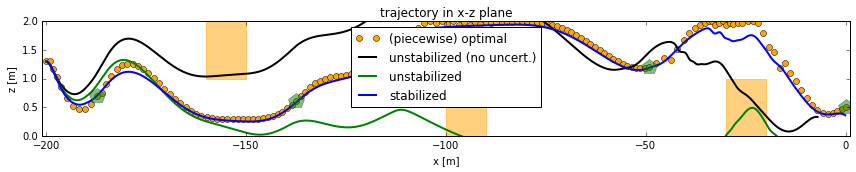

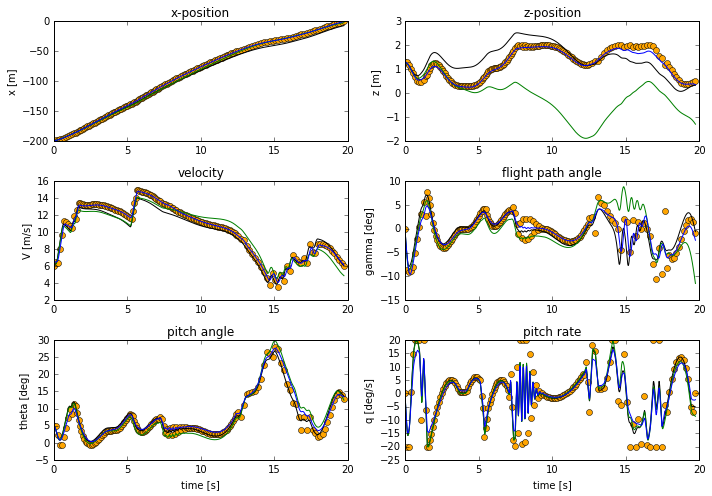

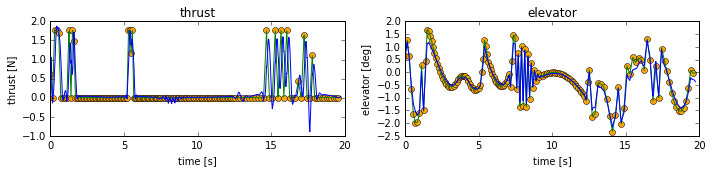

In [57]:
trajplot_rrt = simAndCompare(rrt.plant, x0_rrt, obs=obs, goalnode=rrt.nodes[-1], compare=True)
trajplot_rrt.tight_layout()
trajplot_rrt.show()

Spawning PlanarRigidBodyVisualizer for tree with 0 actuators


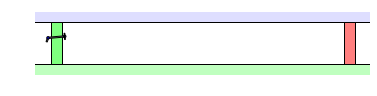

In [78]:
viz = urdfViz(rrt.plant)
plt.close()
HTML(viz.to_html5_video())

In [5]:
t = 140 # index of simulation run
rho_test = getRho(airplane, t, False)

rho:  53.5232468359
rho:  40.1424351269
rho:  30.1068263452
rho:  22.5801197589
rho:  16.9350898192
rho:  12.7013173644
rho:  9.52598802328
rho:  7.14449101746
rho:  5.3583682631
rho:  4.01877619732
rho:  3.01408214799
rho:  2.26056161099
rho:  1.69542120825
rho:  1.27156590618
rho:  0.953674429638
i:  0 , knot:  140 , rho:  53.5232468359


Area of your region of attraction:  [ 187.96378297]


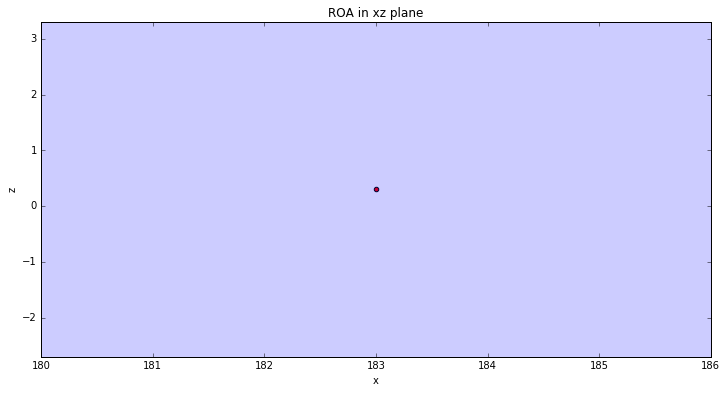

In [6]:
x0 = airplane.xdtraj
u0 = airplane.udtraj
n = airplane.num_states
K = airplane.K
S = airplane.S_lqr

xt = x0[t]
ut = u0[t]
Kt = K[t]
St = S[t]

S = airplane.S_lqr[t]
S_sub = np.reshape(S[[0, 1, 0, 1], [0, 0, 1, 1]], (2, 2))

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(xt[0], xt[1], c='r')    

ellipseInfo = np.linalg.eig(S_sub)
# Eigenvalues are 1/r^2, Eigenvectors are axis directions
axis_1 = ellipseInfo[1][0, :]
if ellipseInfo[0][0] > 0 and ellipseInfo[0][1] > 0:
    r1 = np.sqrt(rho_test)/np.sqrt(ellipseInfo[0][0])
    axis_2 = ellipseInfo[1][1, :]
    r2 = np.sqrt(rho_test)/np.sqrt(ellipseInfo[0][1])
    print "Area of your region of attraction: ", np.pi * r1 * r2
    angle = np.arctan2(-axis_1[1], axis_1[0])
    from matplotlib.patches import Ellipse
    ax.add_patch(Ellipse((xt[0], xt[1]), 
                         2*r1, 2*r2, 
                         angle=angle*180./np.pi, 
                         linewidth=2, fill=True, 
                         alpha=0.2, zorder=2));
    
plt.xlim((xt[0] - 3, xt[0] + 3))
plt.ylim((xt[1] - 3, xt[1] + 3))
plt.title("ROA in xz plane")
plt.xlabel("x")
plt.ylabel("z");